# Project : Airline Passenger Satisfaction

Question: What factors lead to customer satisfaction for an Airline?

------------------------------------------Dataset Details---------------------------------------
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

# Import required  libraries 

In [55]:
#numpy, pandas, scipy,math, matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_validate

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score,classification_report, plot_confusion_matrix
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier


# Load Data Sources 

In [56]:
main_folder= 'C:\\Util\\Cenfotec\\Module5_Task4\\airline-passenger-satisfaction\\'
trainDS = pd.read_csv(main_folder + 'train.csv')
testDS  = pd.read_csv(main_folder + 'test.csv')

In [57]:
trainDS.shape


(103904, 25)

In [58]:
testDS.shape

(25976, 25)

In [59]:
# Display the first 5 lines for Train data
trainDS.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [60]:
# Display the first 5 lines in for Test data
testDS.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [61]:
#check the data types of each variable
trainDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
Unnamed: 0                           103904 non-null int64
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64


In [62]:
#check the data types of each variable
testDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
Unnamed: 0                           25976 non-null int64
id                                   25976 non-null int64
Gender                               25976 non-null object
Customer Type                        25976 non-null object
Age                                  25976 non-null int64
Type of Travel                       25976 non-null object
Class                                25976 non-null object
Flight Distance                      25976 non-null int64
Inflight wifi service                25976 non-null int64
Departure/Arrival time convenient    25976 non-null int64
Ease of Online booking               25976 non-null int64
Gate location                        25976 non-null int64
Food and drink                       25976 non-null int64
Online boarding                      25976 non-null int64
Seat comfort                         25976 non-null int64
Inflight entertai

# Cleaning Data Sources

In [63]:
#----------------TRAIN DATA SOURCE--------------------------

In [64]:
#Verify  NaN
trainDS.isnull()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
# ask for total missing values by column
trainDS.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [66]:
#	Drop	rows	with	any	column	having	NA/null	data.	
trainDS = trainDS.dropna()

In [67]:
#Verify if nan were removed
trainDS.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [68]:
#----------------TEST DATA SOURCE--------------------------

In [69]:
#Verify  NaN
testDS.isnull()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25972,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
# ask for total missing values by column
testDS.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [71]:
#	Drop	rows	with	any	column	having	NA/null	data.	
testDS = testDS.dropna()

In [72]:
#Verify if nan were removed
testDS.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Visualization

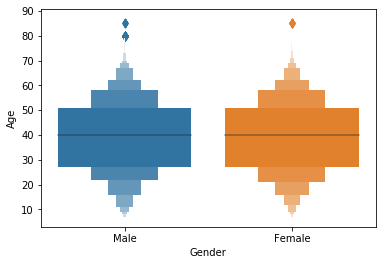

In [73]:
sns.boxenplot(x="Gender", y="Age", data=trainDS);

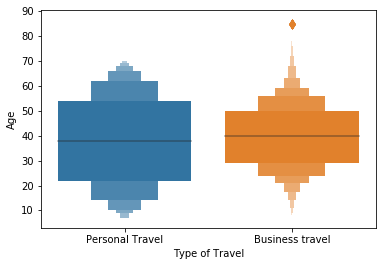

In [74]:
sns.boxenplot(x="Type of Travel", y="Age", data=trainDS);

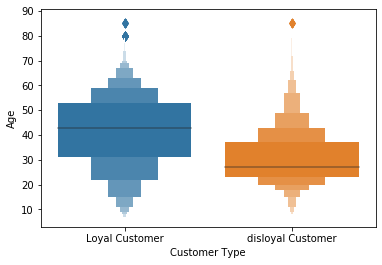

In [75]:
sns.boxenplot(x="Customer Type", y="Age", data=trainDS)

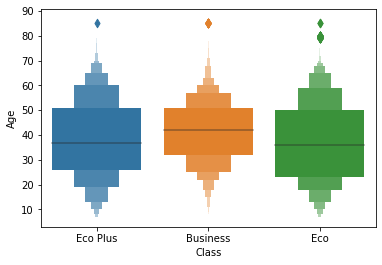

In [76]:
sns.boxenplot(x="Class", y="Age", data=trainDS);

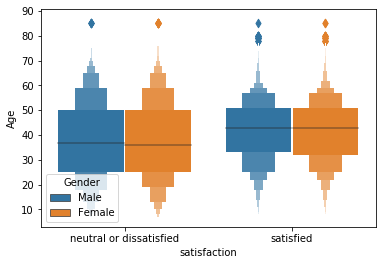

In [77]:
sns.boxenplot(x="satisfaction", y="Age", hue='Gender', data=trainDS);

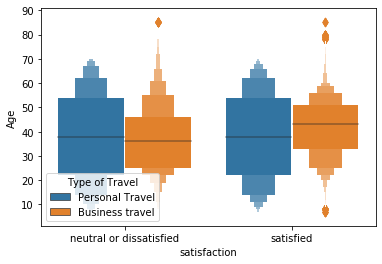

In [78]:
sns.boxenplot(x="satisfaction", y="Age", hue='Type of Travel', data=trainDS);

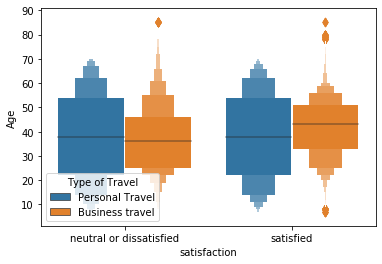

In [79]:
sns.boxenplot(x="satisfaction", y="Age", hue='Type of Travel', data=trainDS);

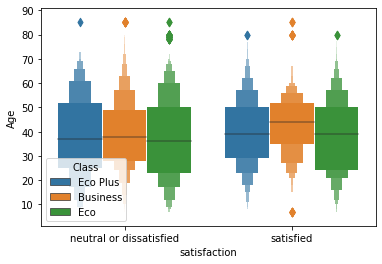

In [80]:
sns.boxenplot(x="satisfaction", y="Age", hue='Class', data=trainDS);

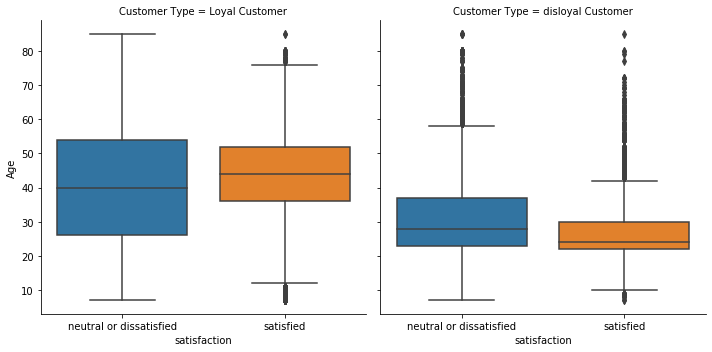

In [81]:
sns.catplot(x="satisfaction", y="Age",  kind="box", col= 'Customer Type' , data=trainDS);

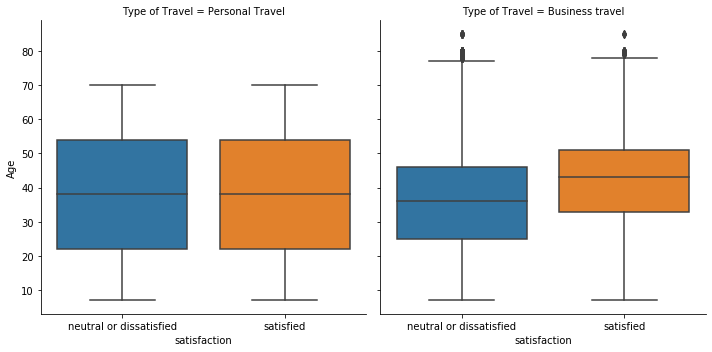

In [82]:
sns.catplot(x="satisfaction", y="Age",  kind="box", col= 'Type of Travel' , data=trainDS);

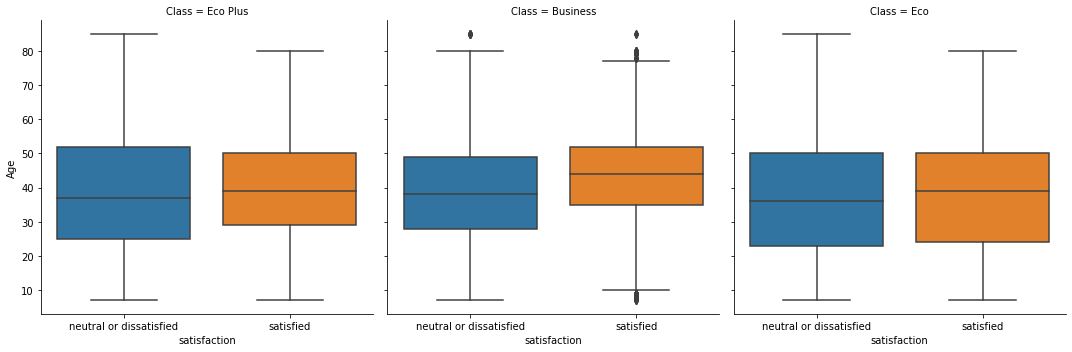

In [83]:
sns.catplot(x="satisfaction", y="Age",  kind="box", col= 'Class' , data=trainDS);

In [84]:
#-------------Encoding Categorical Values

In [85]:
#TRAIN
# One Hot Encoding - integer encode
trainDS_Enc = pd.get_dummies(trainDS, columns=["Gender","Customer Type","Type of Travel","Class"],prefix=["Gender","CustomerType","TravelType","Class"])

In [86]:
trainDS_Enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 30 columns):
Unnamed: 0                           103594 non-null int64
id                                   103594 non-null int64
Age                                  103594 non-null int64
Flight Distance                      103594 non-null int64
Inflight wifi service                103594 non-null int64
Departure/Arrival time convenient    103594 non-null int64
Ease of Online booking               103594 non-null int64
Gate location                        103594 non-null int64
Food and drink                       103594 non-null int64
Online boarding                      103594 non-null int64
Seat comfort                         103594 non-null int64
Inflight entertainment               103594 non-null int64
On-board service                     103594 non-null int64
Leg room service                     103594 non-null int64
Baggage handling                     103594 non-null int64
Chec

In [87]:
# encoding target variable 
cleanup_satisfaction = {"satisfaction":     {"neutral or dissatisfied" : 0,"satisfied": 1}}

In [88]:
trainDS_Enc.replace(cleanup_satisfaction, inplace=True)

In [89]:
# move Target variable to the end
dfTemp = trainDS_Enc.pop("satisfaction")
trainDS_Enc["satisfaction"] = dfTemp

In [90]:
trainDS_Enc.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TravelType_Business travel,TravelType_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0,70172,13,460,3,4,3,1,5,3,...,0,1,1,0,0,1,0,0,1,0
1,1,5047,25,235,3,2,3,3,1,3,...,0,1,0,1,1,0,1,0,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,1,0,1,0,1,0,1,0,0,1
3,3,24026,25,562,2,5,5,5,2,2,...,1,0,1,0,1,0,1,0,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,0,1,1,0,1,0,1,0,0,1


In [91]:
# TEST
# One Hot Encoding - integer encode
testDS_Enc = pd.get_dummies(testDS, columns=["Gender","Customer Type","Type of Travel","Class"],prefix=["Gender","CustomerType","TravelType","Class"])

In [92]:
testDS_Enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 30 columns):
Unnamed: 0                           25893 non-null int64
id                                   25893 non-null int64
Age                                  25893 non-null int64
Flight Distance                      25893 non-null int64
Inflight wifi service                25893 non-null int64
Departure/Arrival time convenient    25893 non-null int64
Ease of Online booking               25893 non-null int64
Gate location                        25893 non-null int64
Food and drink                       25893 non-null int64
Online boarding                      25893 non-null int64
Seat comfort                         25893 non-null int64
Inflight entertainment               25893 non-null int64
On-board service                     25893 non-null int64
Leg room service                     25893 non-null int64
Baggage handling                     25893 non-null int64
Checkin service      

In [93]:
# encoding target variable 
cleanup_satisfaction = {"satisfaction":     {"neutral or dissatisfied" : 0,"satisfied": 1}}

In [94]:
testDS_Enc.replace(cleanup_satisfaction, inplace=True)

In [95]:
# Move target variable to the end
dfTemp = testDS_Enc.pop("satisfaction")
testDS_Enc["satisfaction"] = dfTemp

In [96]:
testDS_Enc.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TravelType_Business travel,TravelType_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0,19556,52,160,5,4,3,4,3,4,...,1,0,1,0,1,0,0,1,0,1
1,1,90035,36,2863,1,1,3,1,5,4,...,1,0,1,0,1,0,1,0,0,1
2,2,12360,20,192,2,0,2,4,2,2,...,0,1,0,1,1,0,0,1,0,0
3,3,77959,44,3377,0,0,0,2,3,4,...,0,1,1,0,1,0,1,0,0,1
4,4,36875,49,1182,2,3,4,3,4,1,...,1,0,1,0,1,0,0,1,0,1


# Correlation Matrix

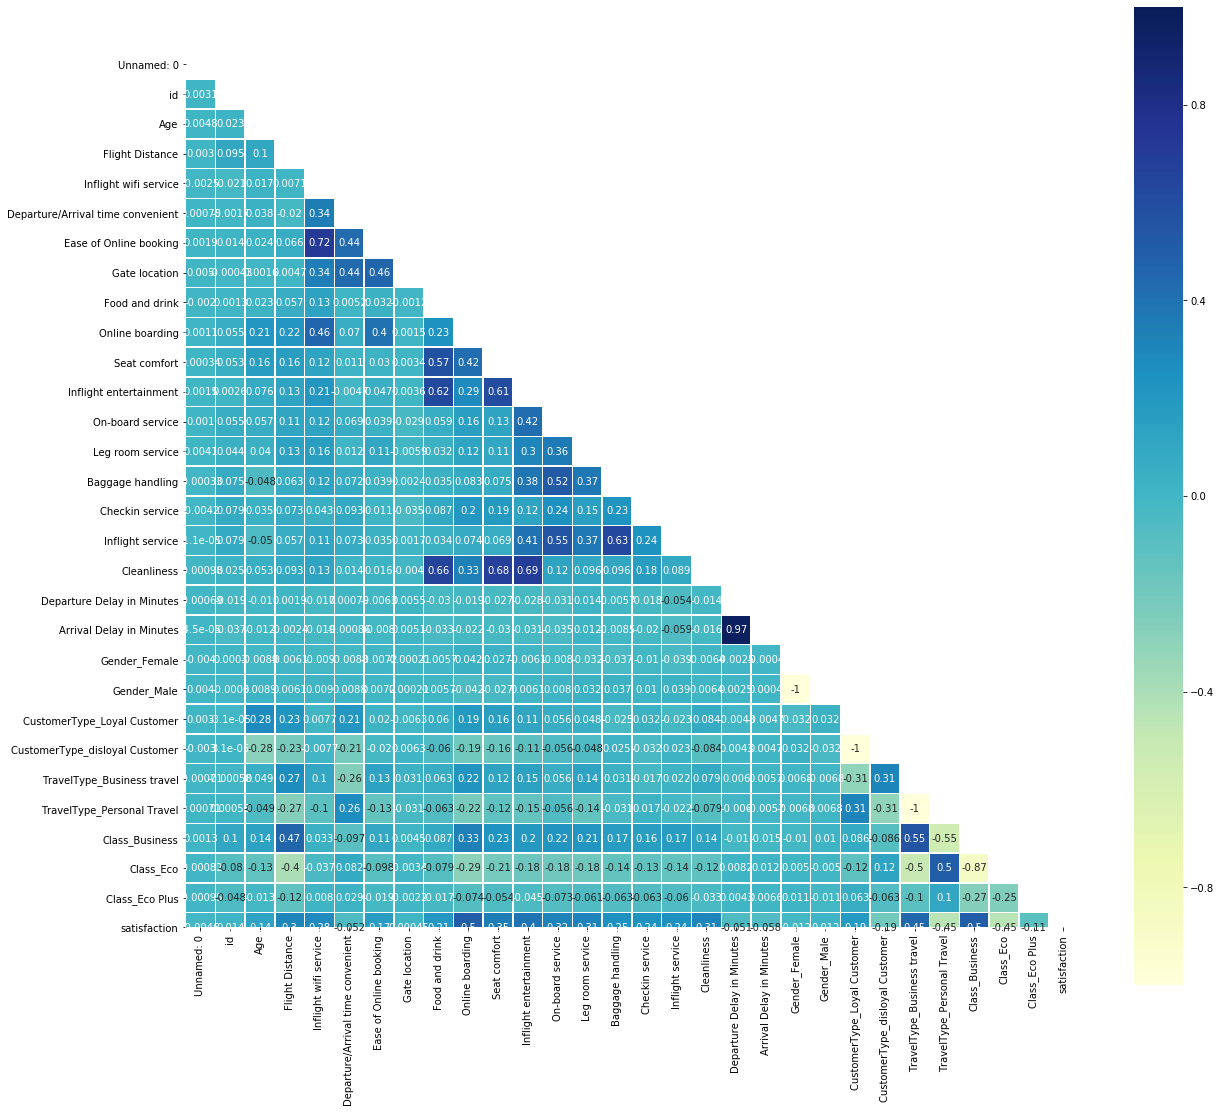

In [98]:
cMatrix_train = trainDS_Enc.corr()
cMatrix_train.style.background_gradient(cmap='coolwarm')
# Generate a mask for the upper triangle
mask = np.zeros_like(cMatrix_train, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cMatrix_train, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

# Split into test and train

In [ ]:
y_train = trainDS_Enc.pop("satisfaction")
X_train = trainDS_Enc

In [44]:
y_test = testDS_Enc.pop("satisfaction")
X_test = testDS_Enc

# Data Normalization

In [45]:
# TRAIN
# normalize the data attributes
scalerTrain = Normalizer().fit(X_train)
normalized_X_train = scalerTrain.transform(X_train)

In [46]:
# summarize transformed data
np.set_printoptions(precision=3)
print(normalized_X_train[0:5,:])

[[0.000e+00 1.000e+00 1.853e-04 6.555e-03 4.275e-05 5.700e-05 4.275e-05
  1.425e-05 7.125e-05 4.275e-05 7.125e-05 7.125e-05 5.700e-05 4.275e-05
  5.700e-05 5.700e-05 7.125e-05 7.125e-05 3.563e-04 2.565e-04 0.000e+00
  1.425e-05 1.425e-05 0.000e+00 0.000e+00 1.425e-05 0.000e+00 0.000e+00
  1.425e-05]
 [1.979e-04 9.989e-01 4.948e-03 4.651e-02 5.938e-04 3.958e-04 5.938e-04
  5.938e-04 1.979e-04 5.938e-04 1.979e-04 1.979e-04 1.979e-04 9.896e-04
  5.938e-04 1.979e-04 7.917e-04 1.979e-04 1.979e-04 1.188e-03 0.000e+00
  1.979e-04 0.000e+00 1.979e-04 1.979e-04 0.000e+00 1.979e-04 0.000e+00
  0.000e+00]
 [1.818e-05 9.999e-01 2.363e-04 1.038e-02 1.818e-05 1.818e-05 1.818e-05
  1.818e-05 4.544e-05 4.544e-05 4.544e-05 4.544e-05 3.635e-05 2.726e-05
  3.635e-05 3.635e-05 3.635e-05 4.544e-05 0.000e+00 0.000e+00 9.088e-06
  0.000e+00 9.088e-06 0.000e+00 9.088e-06 0.000e+00 9.088e-06 0.000e+00
  0.000e+00]
 [1.248e-04 9.997e-01 1.040e-03 2.338e-02 8.322e-05 2.081e-04 2.081e-04
  2.081e-04 8.322e-05 8.3

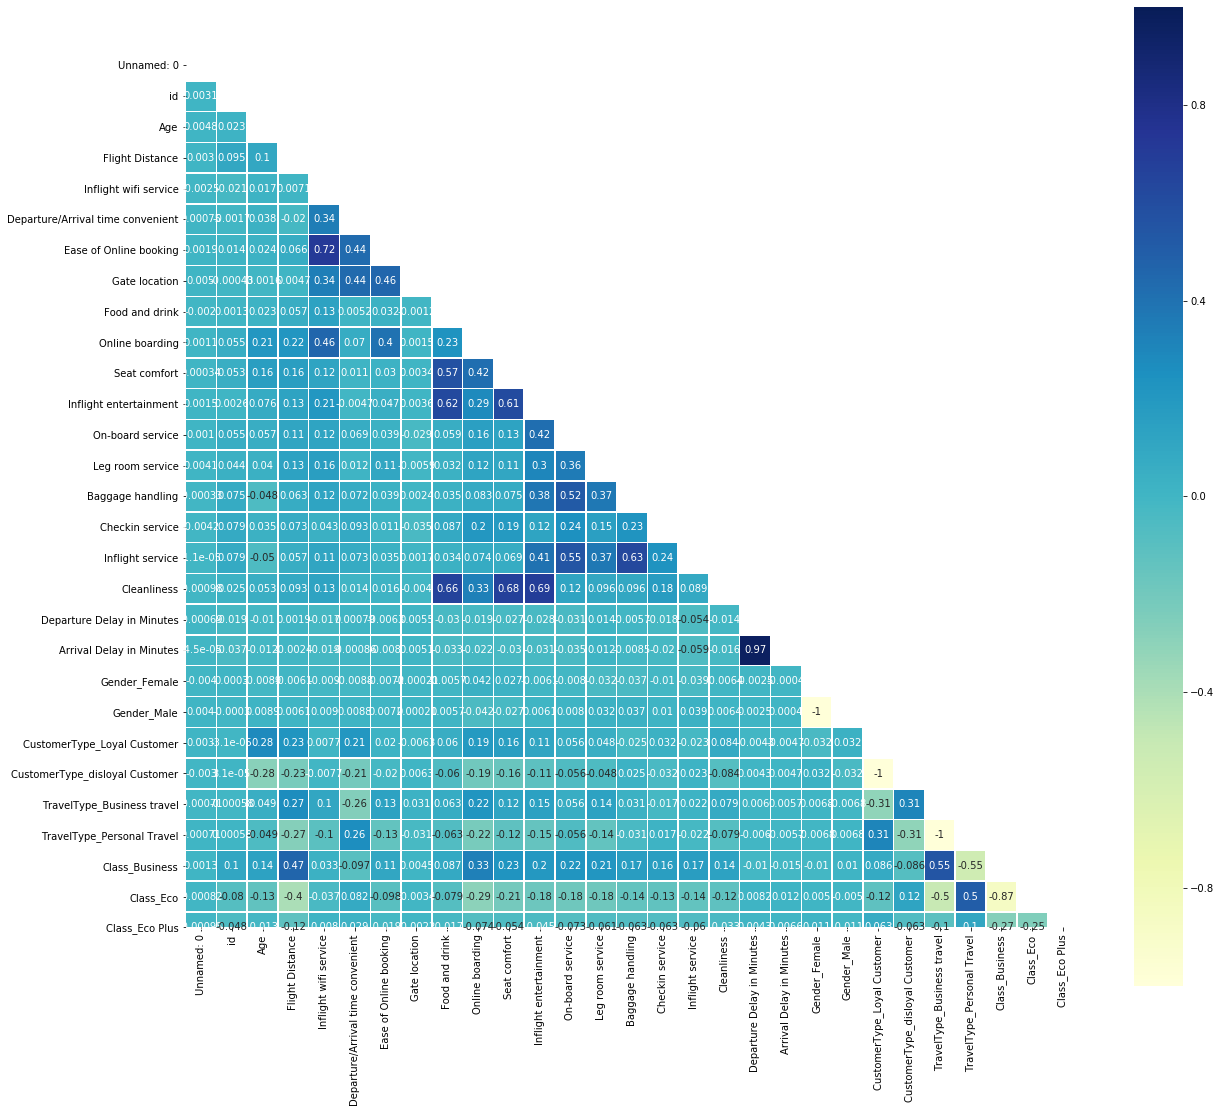

In [47]:
corrMatrix_train = X_train.corr()
corrMatrix_train.style.background_gradient(cmap='coolwarm')
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatrix_train, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix_train, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

In [48]:
#CHECK IF THERE'RE  CORRELATION > 0.9
# map features to their absolute correlation values
corr = X_train.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
display(corr_cols[corr_cols > 0.9])

Arrival Delay in Minutes      0.965481
Departure Delay in Minutes    0.965481
dtype: float64

In [49]:
# drop features > 0.9
#worst features:Arrival Delay in Minutes -  Departure Delay in Minutes: 0.97


In [50]:

X_train = X_train.drop(["Arrival Delay in Minutes","Departure Delay in Minutes"],axis=1)

In [51]:
X_train.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Cleanliness,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TravelType_Business travel,TravelType_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,70172,13,460,3,4,3,1,5,3,...,5,0,1,1,0,0,1,0,0,1
1,1,5047,25,235,3,2,3,3,1,3,...,1,0,1,0,1,1,0,1,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,5,1,0,1,0,1,0,1,0,0
3,3,24026,25,562,2,5,5,5,2,2,...,2,1,0,1,0,1,0,1,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,3,0,1,1,0,1,0,1,0,0


In [52]:
X_test = X_test.drop(["Arrival Delay in Minutes","Departure Delay in Minutes"],axis=1)

In [53]:
X_test.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Cleanliness,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TravelType_Business travel,TravelType_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,19556,52,160,5,4,3,4,3,4,...,5,1,0,1,0,1,0,0,1,0
1,1,90035,36,2863,1,1,3,1,5,4,...,5,1,0,1,0,1,0,1,0,0
2,2,12360,20,192,2,0,2,4,2,2,...,2,0,1,0,1,1,0,0,1,0
3,3,77959,44,3377,0,0,0,2,3,4,...,4,0,1,1,0,1,0,1,0,0
4,4,36875,49,1182,2,3,4,3,4,1,...,4,1,0,1,0,1,0,0,1,0


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 27 columns):
Unnamed: 0                           25893 non-null int64
id                                   25893 non-null int64
Age                                  25893 non-null int64
Flight Distance                      25893 non-null int64
Inflight wifi service                25893 non-null int64
Departure/Arrival time convenient    25893 non-null int64
Ease of Online booking               25893 non-null int64
Gate location                        25893 non-null int64
Food and drink                       25893 non-null int64
Online boarding                      25893 non-null int64
Seat comfort                         25893 non-null int64
Inflight entertainment               25893 non-null int64
On-board service                     25893 non-null int64
Leg room service                     25893 non-null int64
Baggage handling                     25893 non-null int64
Checkin service      

# Model Evaluation 

In [132]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    #plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)
    return model, roc_auc

In [125]:
def run_model2(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc

In [126]:
#-----------Random Forest 

In [127]:
params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 1200,
         'random_state': 42}

In [130]:
model_rf = RandomForestClassifier(**params_rf)


ROC_AUC = 0.9632225908772003
              precision    recall  f1-score   support

           0    0.95874   0.98038   0.96944     14528
           1    0.97418   0.94606   0.95991     11365

    accuracy                        0.96532     25893
   macro avg    0.96646   0.96322   0.96468     25893
weighted avg    0.96551   0.96532   0.96526     25893



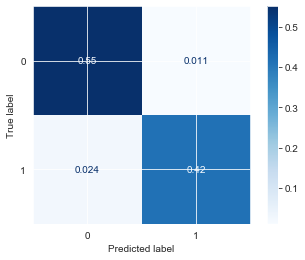

In [131]:
model_rf, roc_auc_rf = run_model2(model_rf, X_train, y_train, X_test, y_test)

In [133]:
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model_rf,X_test, y_test,scoring=scoring)

In [134]:
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [135]:
for scr in scores.keys():
     print("key:   " + scr )
     print(scores[scr])

key:   fit_time
[21.542 22.051 21.516 22.737 22.754]
key:   score_time
[0.79  0.81  0.811 1.034 0.801]
key:   test_precision_macro
[0.959 0.963 0.961 0.958 0.964]
key:   test_recall_macro
[0.957 0.959 0.958 0.956 0.961]


In [136]:
#-----------Support Vector Machine

In [145]:
model_svm = svm.SVC()

ROC_AUC = 0.6127999381263675
              precision    recall  f1-score   support

           0    0.63188   0.88367   0.73686     14528
           1    0.69692   0.34193   0.45877     11365

    accuracy                        0.64589     25893
   macro avg    0.66440   0.61280   0.59782     25893
weighted avg    0.66043   0.64589   0.61480     25893



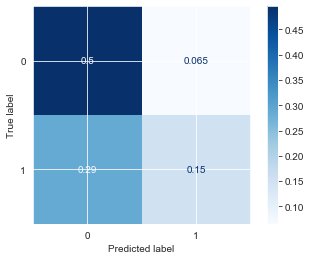

In [146]:
model_svm, roc_auc_svm = run_model2(model_svm, X_train, y_train, X_test, y_test)

In [148]:
scores = cross_validate(model_svm,X_test, y_test,scoring=scoring)

In [149]:
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [150]:
for scr in scores.keys():
     print("key:   " + scr )
     print(scores[scr])

key:   fit_time
[18.231 18.334 18.958 19.124 20.041]
key:   score_time
[2.846 2.886 2.907 3.199 3.051]
key:   test_precision_macro
[0.666 0.662 0.653 0.678 0.659]
key:   test_recall_macro
[0.606 0.601 0.599 0.614 0.6  ]


In [ ]:
#---------------- Stochastic Gradient Descent (SGD)

In [163]:
params_sgd = {'loss': 'log',
              'max_iter': 1000}

In [164]:
model_sgd = SGDClassifier(**params_sgd)

ROC_AUC = 0.6123550851210628
              precision    recall  f1-score   support

           0    0.64588   0.75124   0.69458     14528
           1    0.59822   0.47347   0.52859     11365

    accuracy                        0.62932     25893
   macro avg    0.62205   0.61236   0.61158     25893
weighted avg    0.62496   0.62932   0.62172     25893



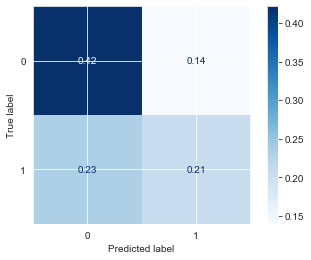

In [165]:
model_sgd, roc_auc_sgd = run_model2(model_sgd, X_train, y_train, X_test, y_test)

In [166]:
scores = cross_validate(model_sgd,X_test, y_test,scoring=scoring)

In [167]:
for scr in scores.keys():
     print("key:   " + scr )
     print(scores[scr])

key:   fit_time
[0.699 0.812 0.703 0.747 0.607]
key:   score_time
[0.005 0.006 0.005 0.007 0.006]
key:   test_precision_macro
[0.584 0.631 0.615 0.72  0.631]
key:   test_recall_macro
[0.527 0.528 0.565 0.501 0.548]


In [168]:
#---------------------------Neural network models -  Multi-layer Perceptron


In [175]:
params_mlp = {'solver': 'lbfgs',
              'alpha': 1e-5,
             'hidden_layer_sizes':(15,),
             'random_state':1}

In [176]:
model_mlp = MLPClassifier(**params_mlp)

ROC_AUC = 0.5153345221921387
              precision    recall  f1-score   support

           0    0.58176   0.37858   0.45868     14528
           1    0.45082   0.65209   0.53309     11365

    accuracy                        0.49863     25893
   macro avg    0.51629   0.51533   0.49588     25893
weighted avg    0.52429   0.49863   0.49134     25893



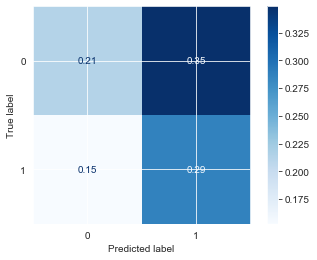

In [177]:
model_mlp, roc_auc_mlp = run_model2(model_mlp, X_train, y_train, X_test, y_test)

In [178]:
scores = cross_validate(model_mlp,X_test, y_test,scoring=scoring)

C:\Users\DGamboa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DGamboa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DGamboa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
for scr in scores.keys():
     print("key:   " + scr )
     print(scores[scr])

key:   fit_time
[0.152 0.117 0.149 0.108 0.128]
key:   score_time
[0.005 0.006 0.009 0.006 0.009]
key:   test_precision_macro
[0.501 0.534 0.281 0.281 0.281]
key:   test_recall_macro
[0.5   0.505 0.5   0.5   0.5  ]


# Summary

In [ ]:
Best Model
Random Forrest : ROC_AUC = 0.9632225908772003